<a href="https://colab.research.google.com/github/Rahulcva/UCI-Heart-Disease-Prediction-using-Random-Forest/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import pandas as pd
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced plotting
from sklearn.model_selection import train_test_split  # For splitting dataset into train/test
from sklearn.ensemble import RandomForestClassifier  # RandomForest model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc  # For evaluation
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
path= kagglehub.dataset_download("redwankarimsony/heart-disease-data") # Replace with the correct path and filename
df = pd.read_csv(path+ '/heart_disease_uci.csv')

In [ ]:
# 2. Exploratory Data Analysis (EDA)
# View the first few rows of the dataset
print(df.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [ ]:

df = df.drop(columns = ["id"])
df = df.drop(columns = ["ca"])



In [ ]:
# 3. Handle missing values (if any)
# Checking for missing values
print(df.isnull().sum())  # Display count of missing values for each column

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
thal        486
num           0
dtype: int64


In [ ]:
# Handle missing values in numerical columns (fill with the median)
df["trestbps"].fillna(df["trestbps"].median(), inplace = True)
df["chol"].fillna(df["chol"].median(), inplace = True)
df["fbs"].fillna(df["fbs"].mode()[0], inplace = True)
df["restecg"].fillna(df["restecg"].mode()[0], inplace = True)
df["thalch"].fillna(df["thalch"].mode()[0], inplace = True)
df["exang"].fillna(df["exang"].mode()[0], inplace = True)
df["oldpeak"].fillna(df["oldpeak"].median(), inplace = True)
df["slope"].fillna(df["slope"].mode()[0], inplace = True)
df["thal"].fillna(df["thal"].mode()[0], inplace = True)


<ipython-input-37-5bd5d4b686fe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["trestbps"].fillna(df["trestbps"].median(), inplace = True)
<ipython-input-37-5bd5d4b686fe>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
# Checking if any missing values remain
print(df.isnull().sum())  # Should print 0 for all columns now

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


In [ ]:
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,normal,1
916,62,Male,VA Long Beach,typical angina,130.0,139.0,False,st-t abnormality,150.0,False,0.5,flat,normal,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,150.0,False,0.5,flat,normal,0


In [ ]:
# 0 = no heart disease,    1 = mild heart disease`,2 = moderate heart disease,3 = severe heart disease,4 = critical heart disease
x=df.iloc[:,:-1]

In [ ]:
x

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,normal
916,62,Male,VA Long Beach,typical angina,130.0,139.0,False,st-t abnormality,150.0,False,0.5,flat,normal
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,fixed defect
918,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,150.0,False,0.5,flat,normal


In [ ]:
y=df.iloc[:, -1]

In [ ]:
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
915,1
916,0
917,2
918,0


In [ ]:
# 6. Split data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
categorical_features = ["sex", "dataset", "cp", "restecg", "exang", "slope", "thal"]
numerical_features = ["age", "trestbps", "chol", "fbs", "thalch", "oldpeak"]

X_train_num = x_train[numerical_features]
X_test_num = x_test[numerical_features]

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_cat = x_train[categorical_features]
X_test_cat = x_test[categorical_features]

encoder = OneHotEncoder(sparse_output = False, drop = "first")
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_transformed = np.hstack((X_train_num_scaled, X_train_cat_encoded))
X_test_transformed = np.hstack((X_test_num_scaled, X_test_cat_encoded))



In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_transformed, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# 8. Make predictions on the test data
y_pred = rf.predict(X_test_transformed)

In [ ]:
# 9. Evaluate the model
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')  # Prints accuracy of the model

Accuracy: 0.5543


In [ ]:
# Classification Report: Precision, Recall, F1-score for each class
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.89      0.76        75
           1       0.49      0.52      0.50        54
           2       0.36      0.16      0.22        25
           3       0.23      0.12      0.15        26
           4       0.00      0.00      0.00         4

    accuracy                           0.55       184
   macro avg       0.35      0.34      0.33       184
weighted avg       0.49      0.55      0.51       184



In [ ]:
# Confusion Matrix: True Positive, False Positive, etc.
print("Confusion Matrix:")
cm=confusion_matrix(y_test, y_pred)
print(cm)

Confusion Matrix:
[[67  6  2  0  0]
 [21 28  3  2  0]
 [ 6  9  4  6  0]
 [ 8 13  1  3  1]
 [ 0  1  1  2  0]]


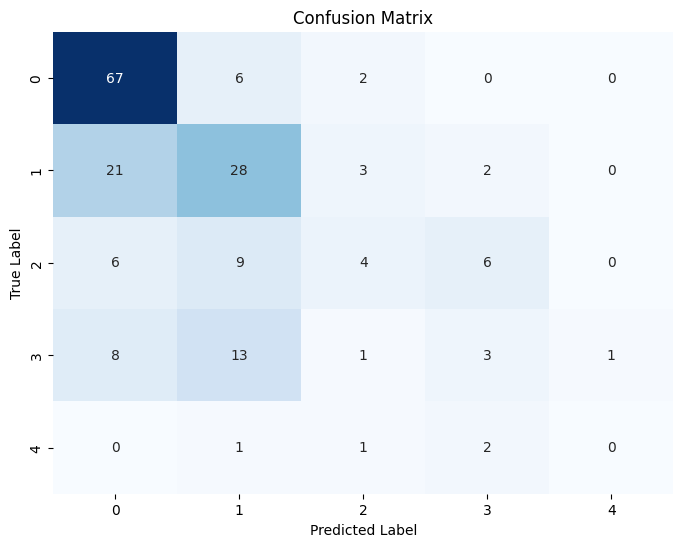

In [ ]:
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", cbar = False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

